# Stochastic, Mini Batch e Full Batch Gradient Descend
In questo notebook eseguiremo una classificazione utilizzando Full Batch Gradient Descend, Stochastic Gradient Descend e Mini Batch Gradient Descend al fine di confrontare le oscillazioni della funzione di costo per ognuno di essi.<br>
Importiamo le librerie necessarie

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

Ed utilizziamo la funzione *make_classification* di scikit-learn per creare un dataset ad-hoc in cui poter eseguire la nostra classificazione

In [2]:
X, Y = make_classification(n_samples=1250, n_features=4, n_informative=2, random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

## Stochastic Gradient Descend

Lo Stochastic Gradient Descend (SGD) è una versione del Gradient Descend che utilizza un solo esempio di addestramento per volta durante l'ottimizzazione.
<br><br>
Possiamo utilizzare la classe <span style="font-family: Monaco">SGDClassifier</span> di scikit-learn, di default questa utilizza lo SGD per addestrare una SVM, ma possiamo modificare la tipologia di modello semplicemente cambiando la funzione di costo:

 * **hinge**: l'SGD addestrerà una SVM
 * **log**: l'SGD addestrerà una regressione logistica
 * **perceptron:** l'SGD addestrerà un percettrone
 
Per evitare cicli bisogna mischiare il train set ad ogni epoca, per farlo basta impostare il parametro <span style="font-family: Monaco">shuffle</span>
 a True (questo valore è settato di default, quindi è possibile anche ometterlo)
 <br><br>
**NOTA BENE** Lo Stochastic Gradient Descend è un processo stocastico (ma vah), anche utilizzando gli stessi iperparametri un modello fornirà risultati lievemente differenti se riaddestrato.

In [3]:
%%time
from sklearn.linear_model import SGDClassifier
#verbose ci mostrerà informazioni sull'avanzamento dell'addestramento
sgd = SGDClassifier(loss="log", verbose=False, shuffle=True)
sgd.fit(X_train,Y_train)
print("LOSS: %.4f" % (log_loss(Y_test, sgd.predict_proba(X_test))))

LOSS: 0.1203
CPU times: total: 0 ns
Wall time: 9 ms


La classe SGDClassifier ci mette a disposizione il metodo <span style="font-family: Monaco">partial_fit</span>, che ci permette di eseguire l'addestramento su una parte di dati definita da noi.<br>
Utilizziamo <span style="font-family: Monaco">partial_fit</span> per eseguire lo **stochastic gradient descend** e raccogliamo il valore della funzione di costo ad ogni iterazione.<br>
**NOTA BENE** se utilizziamo <span style="font-family: Monaco">partial_fit</span> dobbiamo mischiare i dati manualmente ad ogni epoca, per farlo possiamo utilizzare il metodo <span style="font-family: Monaco">shuffle</span> di scikit-learn.

In [5]:
%%time

from sklearn.utils import shuffle

epochs = 5

n_batches=X_train.shape[0]
batch_size = X_train.shape[0]/n_batches
print(f'n_batches={n_batches}')
print(f'batch_size={batch_size}')

classes = np.unique(Y_train)

sgd = SGDClassifier(loss="log")
sgd_losses = []

for epoch in range(epochs):
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]

            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            sgd_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

n_batches=1000
batch_size=1.0
Loss all'epoca 1 = 0.5631
Loss all'epoca 2 = 0.4864
Loss all'epoca 3 = 0.2854
Loss all'epoca 4 = 0.4824
Loss all'epoca 5 = 0.3144
CPU times: total: 5 s
Wall time: 5.02 s


I risultati non sono buoni perché il numero di epoche definito non è sufficente per far convergere il gradient descend e quindi per trovare i coefficenti ottimali del modello.
<br><br>
Visualizzaziamo il grafico della funzione di costo ad ogni iterazione.

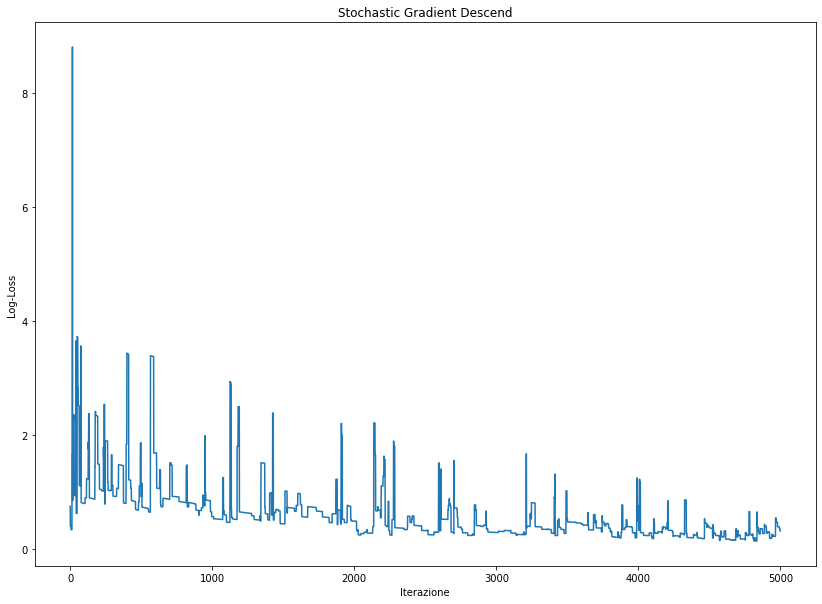

In [6]:
plt.figure(figsize=(14,10))
plt.title("Stochastic Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(sgd_losses)

Il graico della funzione di costo per iterazione presenta un notevole rumore.

## Full Batch Gradient Descend
Adesso eseguiamo un Full Batch Gradient Descend sempre servendoci della funzione <span style="font-family: Monaco">partial_fit</span>, per farlo è sufficente passare l'intero train set ad ogni iterazione.

In [7]:
%%time

epochs = 200

n_batches=1

batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y)

sgd = SGDClassifier(loss="log")
full_losses = []

for epoch in range(epochs):
        loss = 0.
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]

            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            full_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

Loss all'epoca 1 = 0.9563
Loss all'epoca 2 = 1.3615
Loss all'epoca 3 = 0.4299
Loss all'epoca 4 = 0.2582
Loss all'epoca 5 = 0.1941
Loss all'epoca 6 = 0.1704
Loss all'epoca 7 = 0.1456
Loss all'epoca 8 = 0.1417
Loss all'epoca 9 = 0.1374
Loss all'epoca 10 = 0.1633
Loss all'epoca 11 = 0.1280
Loss all'epoca 12 = 0.1289
Loss all'epoca 13 = 0.1460
Loss all'epoca 14 = 0.1553
Loss all'epoca 15 = 0.1417
Loss all'epoca 16 = 0.1224
Loss all'epoca 17 = 0.1510
Loss all'epoca 18 = 0.1767
Loss all'epoca 19 = 0.1134
Loss all'epoca 20 = 0.1760
Loss all'epoca 21 = 0.1256
Loss all'epoca 22 = 0.1231
Loss all'epoca 23 = 0.1213
Loss all'epoca 24 = 0.1268
Loss all'epoca 25 = 0.1073
Loss all'epoca 26 = 0.1279
Loss all'epoca 27 = 0.1507
Loss all'epoca 28 = 0.1234
Loss all'epoca 29 = 0.1412
Loss all'epoca 30 = 0.1089
Loss all'epoca 31 = 0.1249
Loss all'epoca 32 = 0.1384
Loss all'epoca 33 = 0.1268
Loss all'epoca 34 = 0.1149
Loss all'epoca 35 = 0.1104
Loss all'epoca 36 = 0.1081
Loss all'epoca 37 = 0.1154
Loss all'e

Il GD è riuscito a convergere fornendo un buon risultato, vediamo il grafico della funzione di costo ad ogni iterazione ( in questo caso un iterazione corrisponde ad un'epoca )

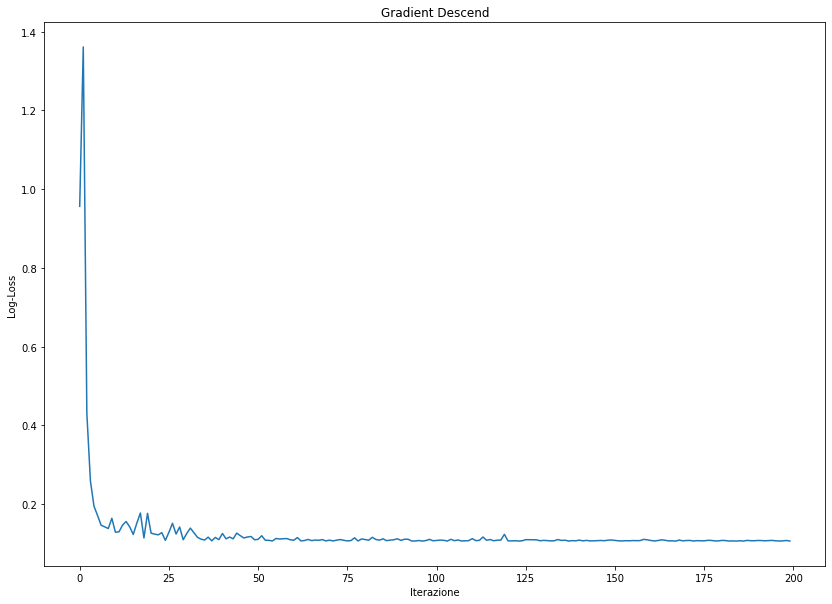

In [8]:
plt.figure(figsize=(14,10))
plt.title("Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(full_losses)

La variazione della funzione di costo è molto più regolare rispetto allo SGD.

## Mini Batch Gradient Descend
Adess eseguiamo un Mini Batch Gradient Descend con 10 batches, quindi, considerando che nel train set ci sono 1000 esempi, eseguiremo il Gradient Descend uilizzando 100 esempi per volta.

In [9]:
%%time

epochs = 50

n_batches=10

batch_size = X_train.shape[0]/n_batches

classes = np.unique(Y)

sgd = SGDClassifier(loss="log")
batch_losses = []

for epoch in range(epochs):
        X_shuffled, Y_shuffled = shuffle(X_train, Y_train)
        for batch in range(n_batches):
            batch_start = int(batch*batch_size)
            batch_end = int((batch+1)*batch_size)
            X_batch = X_shuffled[batch_start:batch_end,:]
            Y_batch = Y_shuffled[batch_start:batch_end]
            print(X_batch.shape)
            sgd.partial_fit(X_batch, Y_batch, classes=classes)
            loss = log_loss(Y_test, sgd.predict_proba(X_test),labels=classes)
            batch_losses.append(loss)       
        print("Loss all'epoca %d = %.4f" % (epoch+1, loss))

(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 1 = 0.3218
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 2 = 0.4893
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 3 = 0.2709
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 4 = 0.2399
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 5 = 0.3959
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 6 = 0.1612
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 7 = 0.1813
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
Loss all'epoca 8 = 0.2001
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)
(100, 4)


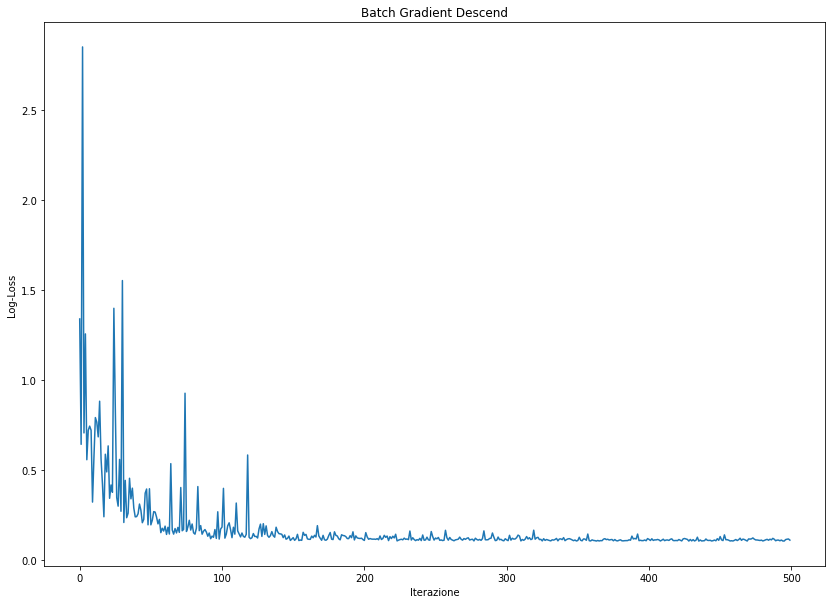

In [10]:
plt.figure(figsize=(14,10))
plt.title("Batch Gradient Descend")
plt.xlabel("Iterazione")
plt.ylabel("Log-Loss")
plt.plot(batch_losses)

## Il confronto
Confrontiamo le oscillazioni della funzione di costo per Full Batch, Stochastic e Mini Batch Gradient Descend, mettendole su di uno stesso grafico

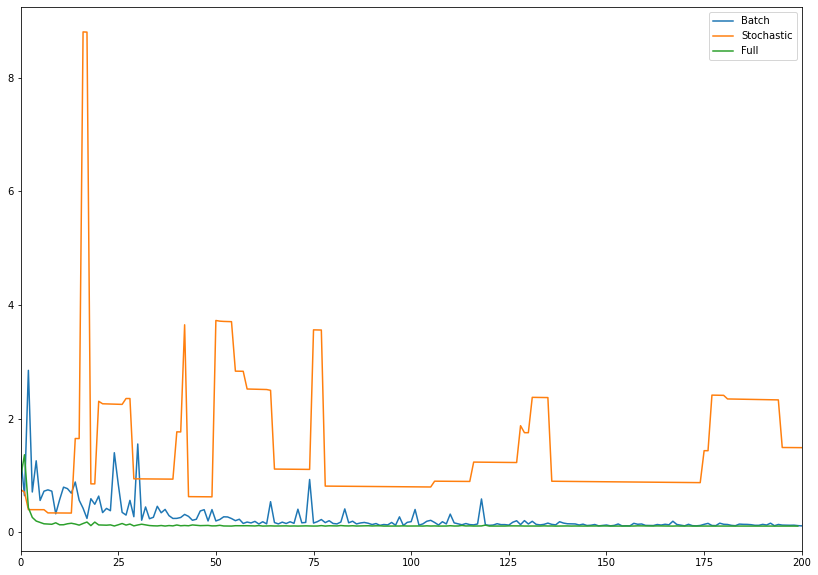

In [11]:
%matplotlib inline
plt.figure(figsize=(14,10))
plt.plot(batch_losses, label="Batch")
plt.plot(sgd_losses, label="Stochastic")
plt.plot(full_losses,label="Full")
plt.xlim(xmin=0,xmax=200)
plt.legend()
plt.show()